In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import matplotlib.ticker as mtick



In [3]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')
print(species.head())
print(observations.head())
print(len(species))
print(len(observations))
from statsmodels.stats.multicomp import pairwise_tukeyhsd


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


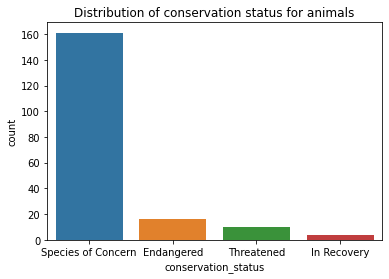

In [4]:
#What is the distribution of conservation_status for animals?
print(species['conservation_status'].unique())
sns.countplot(data = species, x='conservation_status')
plt.title('Distribution of conservation status for animals')
plt.show()

            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  \
0                              Gapper's Red-Backed Vole                 NaN   
1                                 American Bison, Bison                 NaN   
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN   
3     Domestic Sheep, M

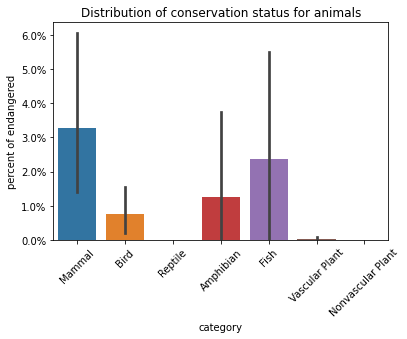

In [16]:
#Are certain types of species more likely to be endangered?
species['endangered']= species['conservation_status'] == 'Endangered'
print(species)
print(sum(species['endangered']))

ax = plt.subplot()
sns.barplot(data = species, x='category', y = 'endangered')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('percent of endangered')
plt.title('Distribution of conservation status for animals')
plt.show()

In [7]:
#Are the differences between species and their conservation status significant?
print(species['category'].unique())
mamal = species.endangered[species.category=='Mammal']
bird = species.endangered[species.category=='Bird']
Reptile = species.endangered[species.category=='Reptile']
Amphibian = species.endangered[species.category=='Amphibian']
Fish = species.endangered[species.category=='Fish']
Vascular = species.endangered[species.category=='Vascular Plant']
Nonvascular = species.endangered[species.category=='Nonvascular Plant']

#fstat, pval = f_oneway(mamal, bird, Reptile, Amphibian, Fish, Vascular, Nonvascular)
#print(pval)
ab_contingency = pd.crosstab(species.category, species.endangered)
print(ab_contingency)
chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
endangered         False  True 
category                       
Amphibian             79      1
Bird                 517      4
Fish                 124      3
Mammal               207      7
Nonvascular Plant    333      0
Reptile               79      0
Vascular Plant      4469      1
2.924654644709551e-21


In [27]:
#Which species were spotted the most at each park?
#print(observations.head())

park_names = list(observations.park_name.unique())
print(park_names)
print(observations[observations['park_name'] == 'Great Smoky Mountains National Park'])
for park in park_names:
    new_park = observations[observations['park_name'] == park]
    sort = new_park.sort_values(by=['observations'], ascending=False)
    print(new_park.iloc[0])
    #plt.clf()

['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']
                scientific_name                            park_name  \
0            Vicia benghalensis  Great Smoky Mountains National Park   
1                Neovison vison  Great Smoky Mountains National Park   
4      Githopsis specularioides  Great Smoky Mountains National Park   
7             Elymus multisetus  Great Smoky Mountains National Park   
14            Fabronia ciliaris  Great Smoky Mountains National Park   
...                         ...                                  ...   
23274       Atriplex subspicata  Great Smoky Mountains National Park   
23282        Thalictrum alpinum  Great Smoky Mountains National Park   
23283           Carex filifolia  Great Smoky Mountains National Park   
23285           Spiza americana  Great Smoky Mountains National Park   
23288       Amaranthus hybridus  Great Smoky Mountains National Park   

       observatio

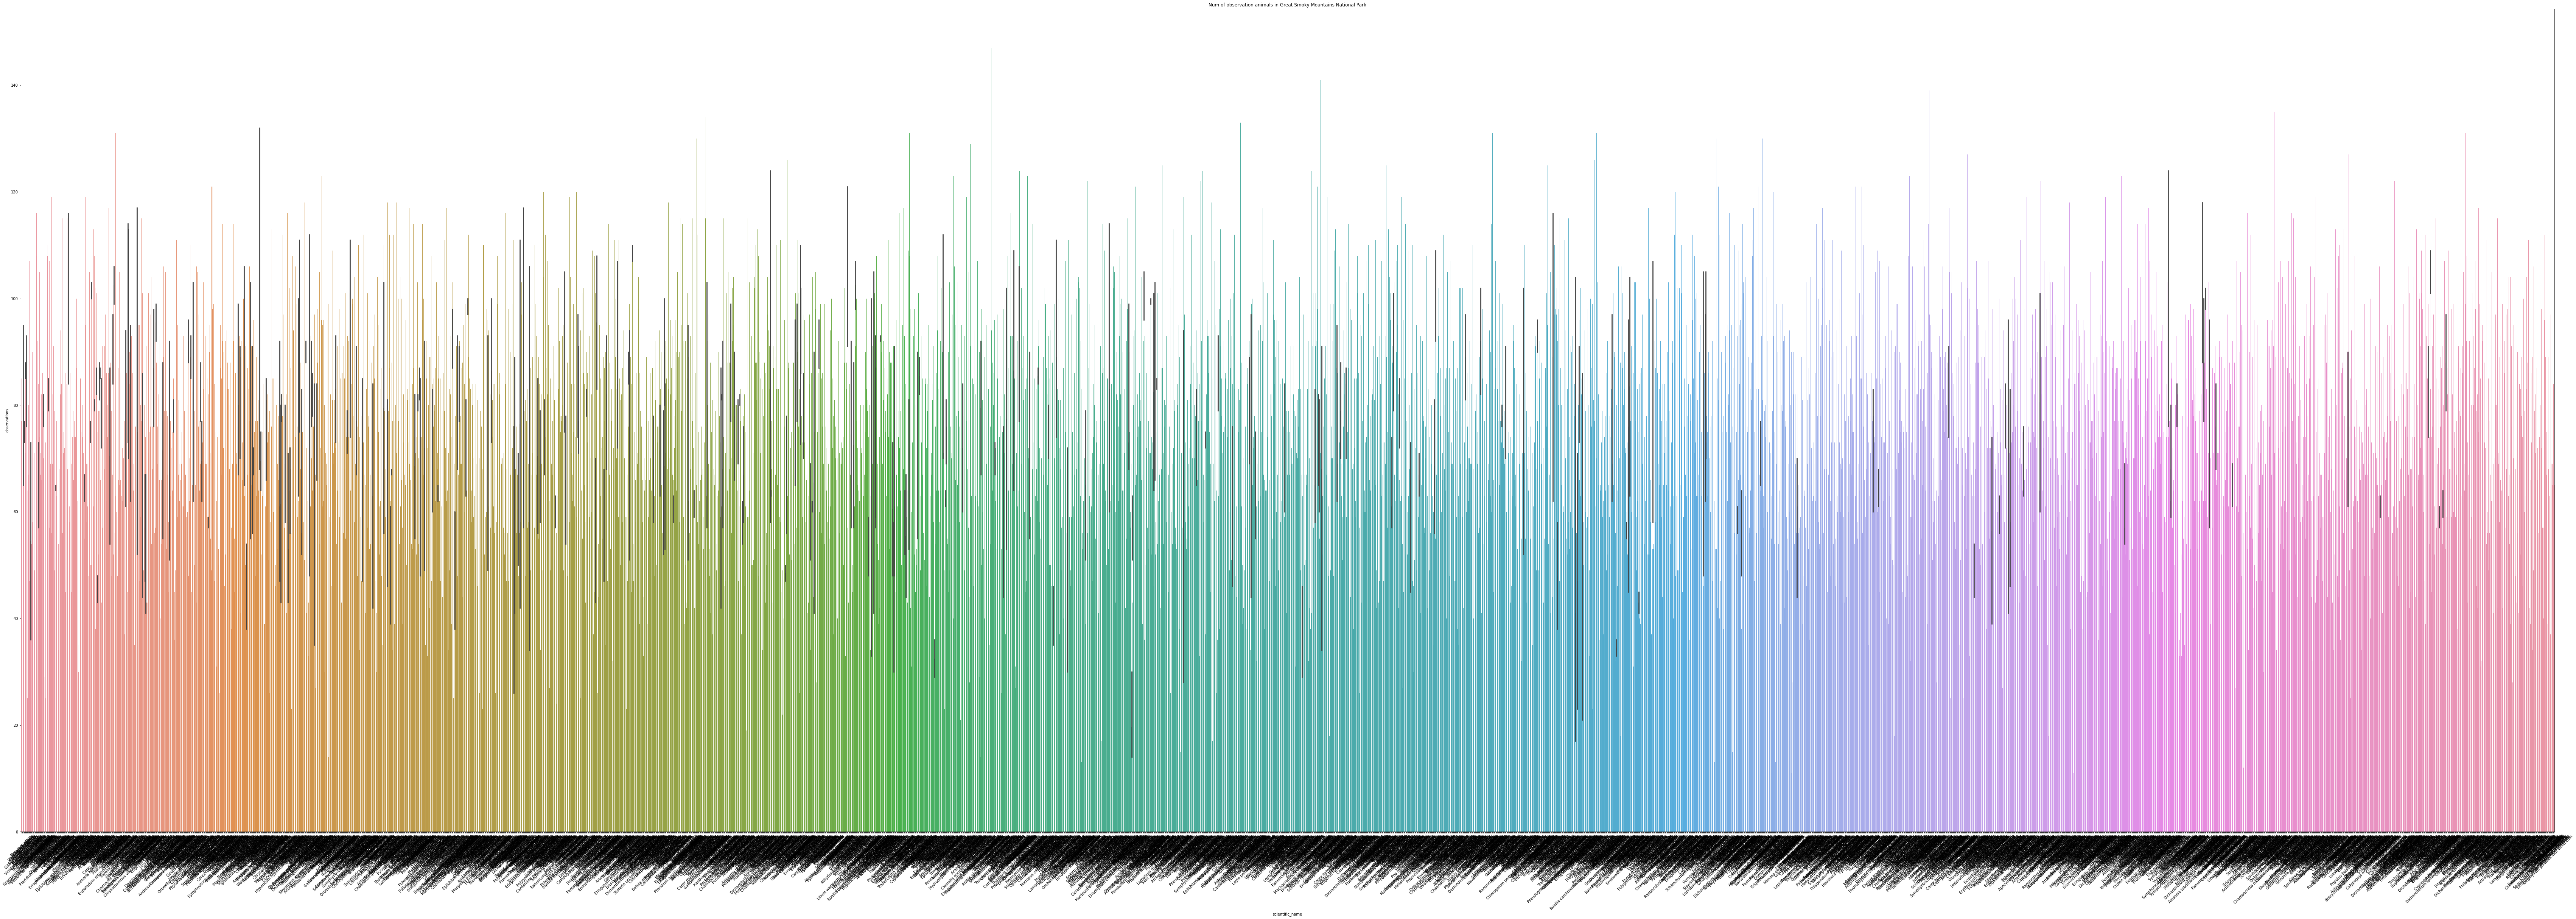

<Figure size 432x288 with 0 Axes>

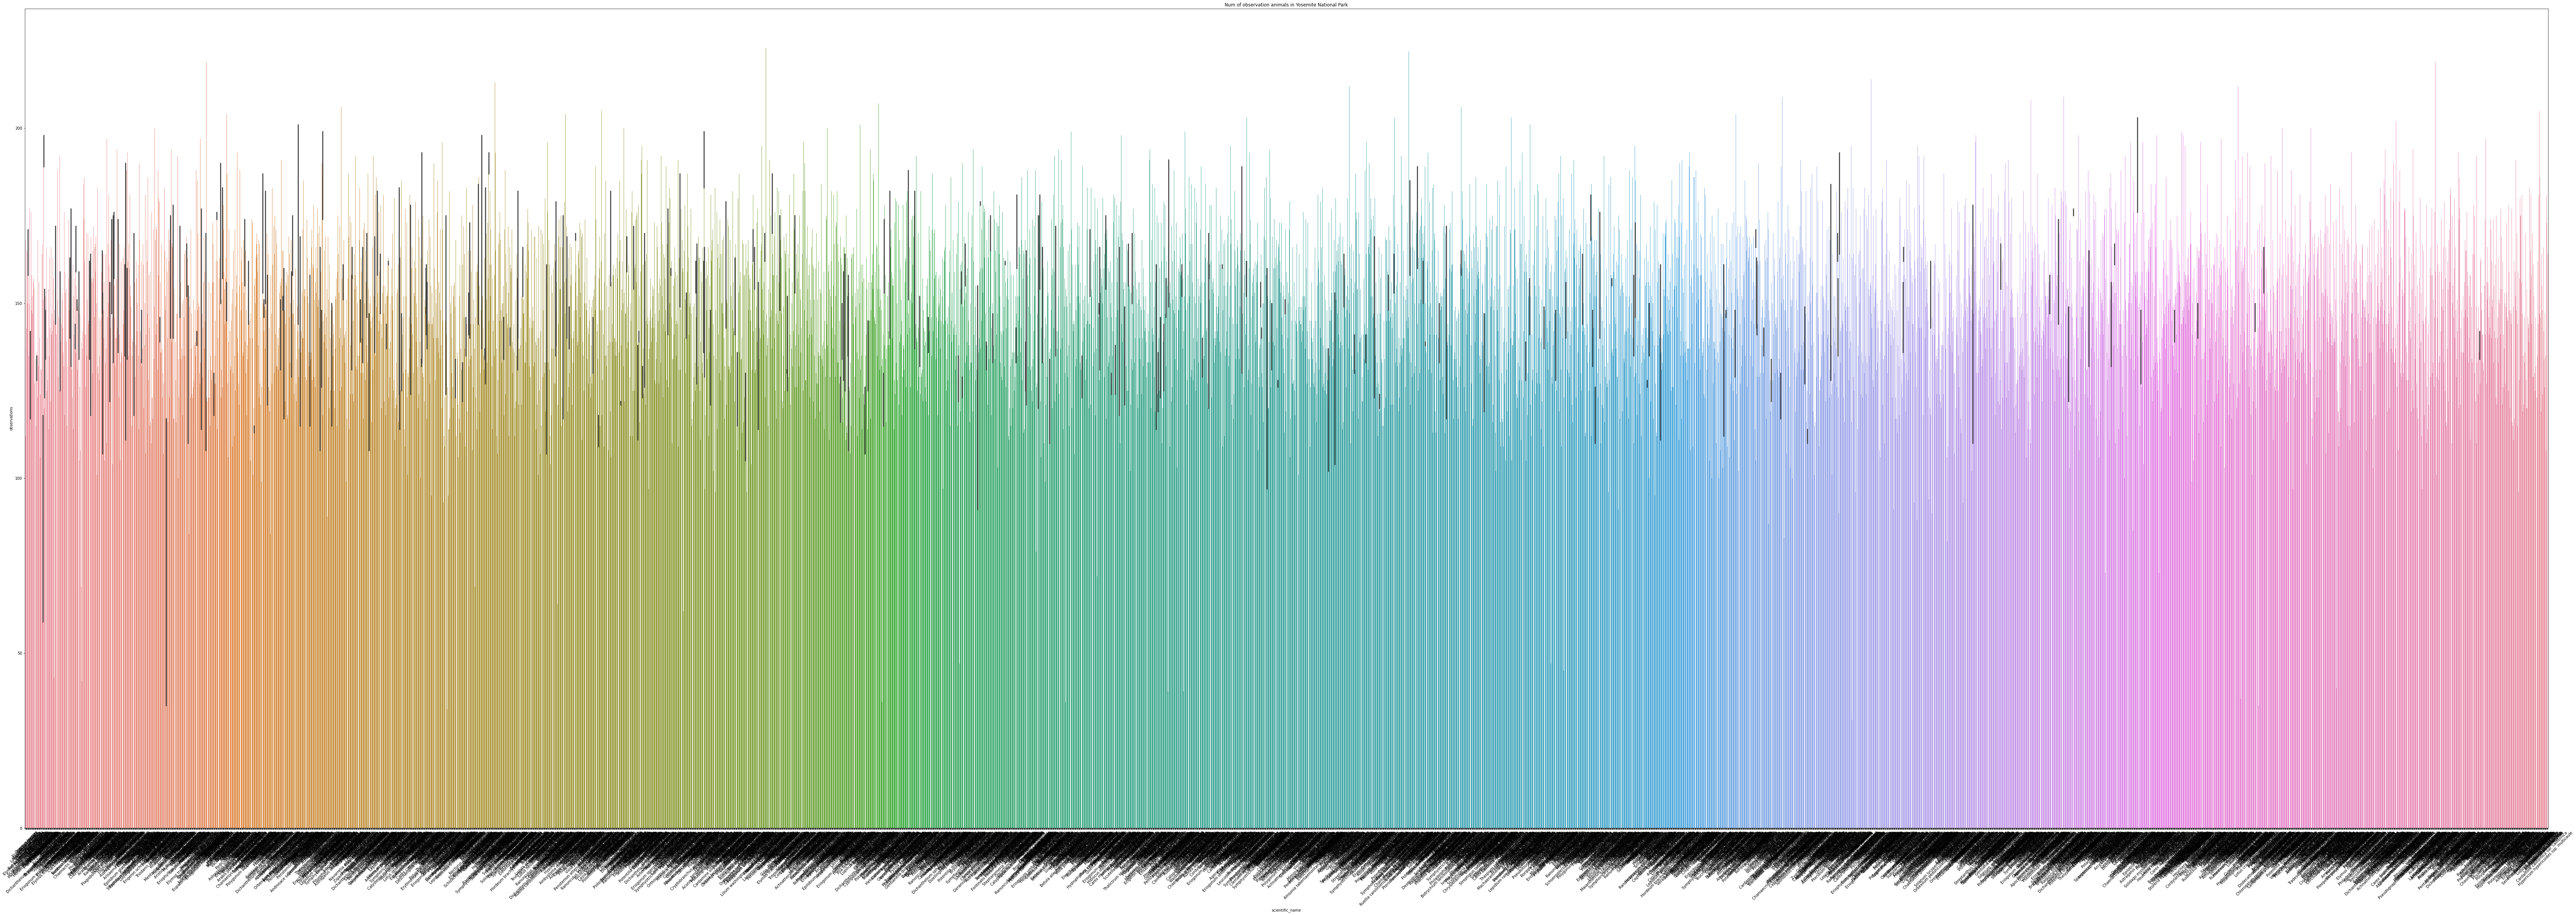

<Figure size 432x288 with 0 Axes>

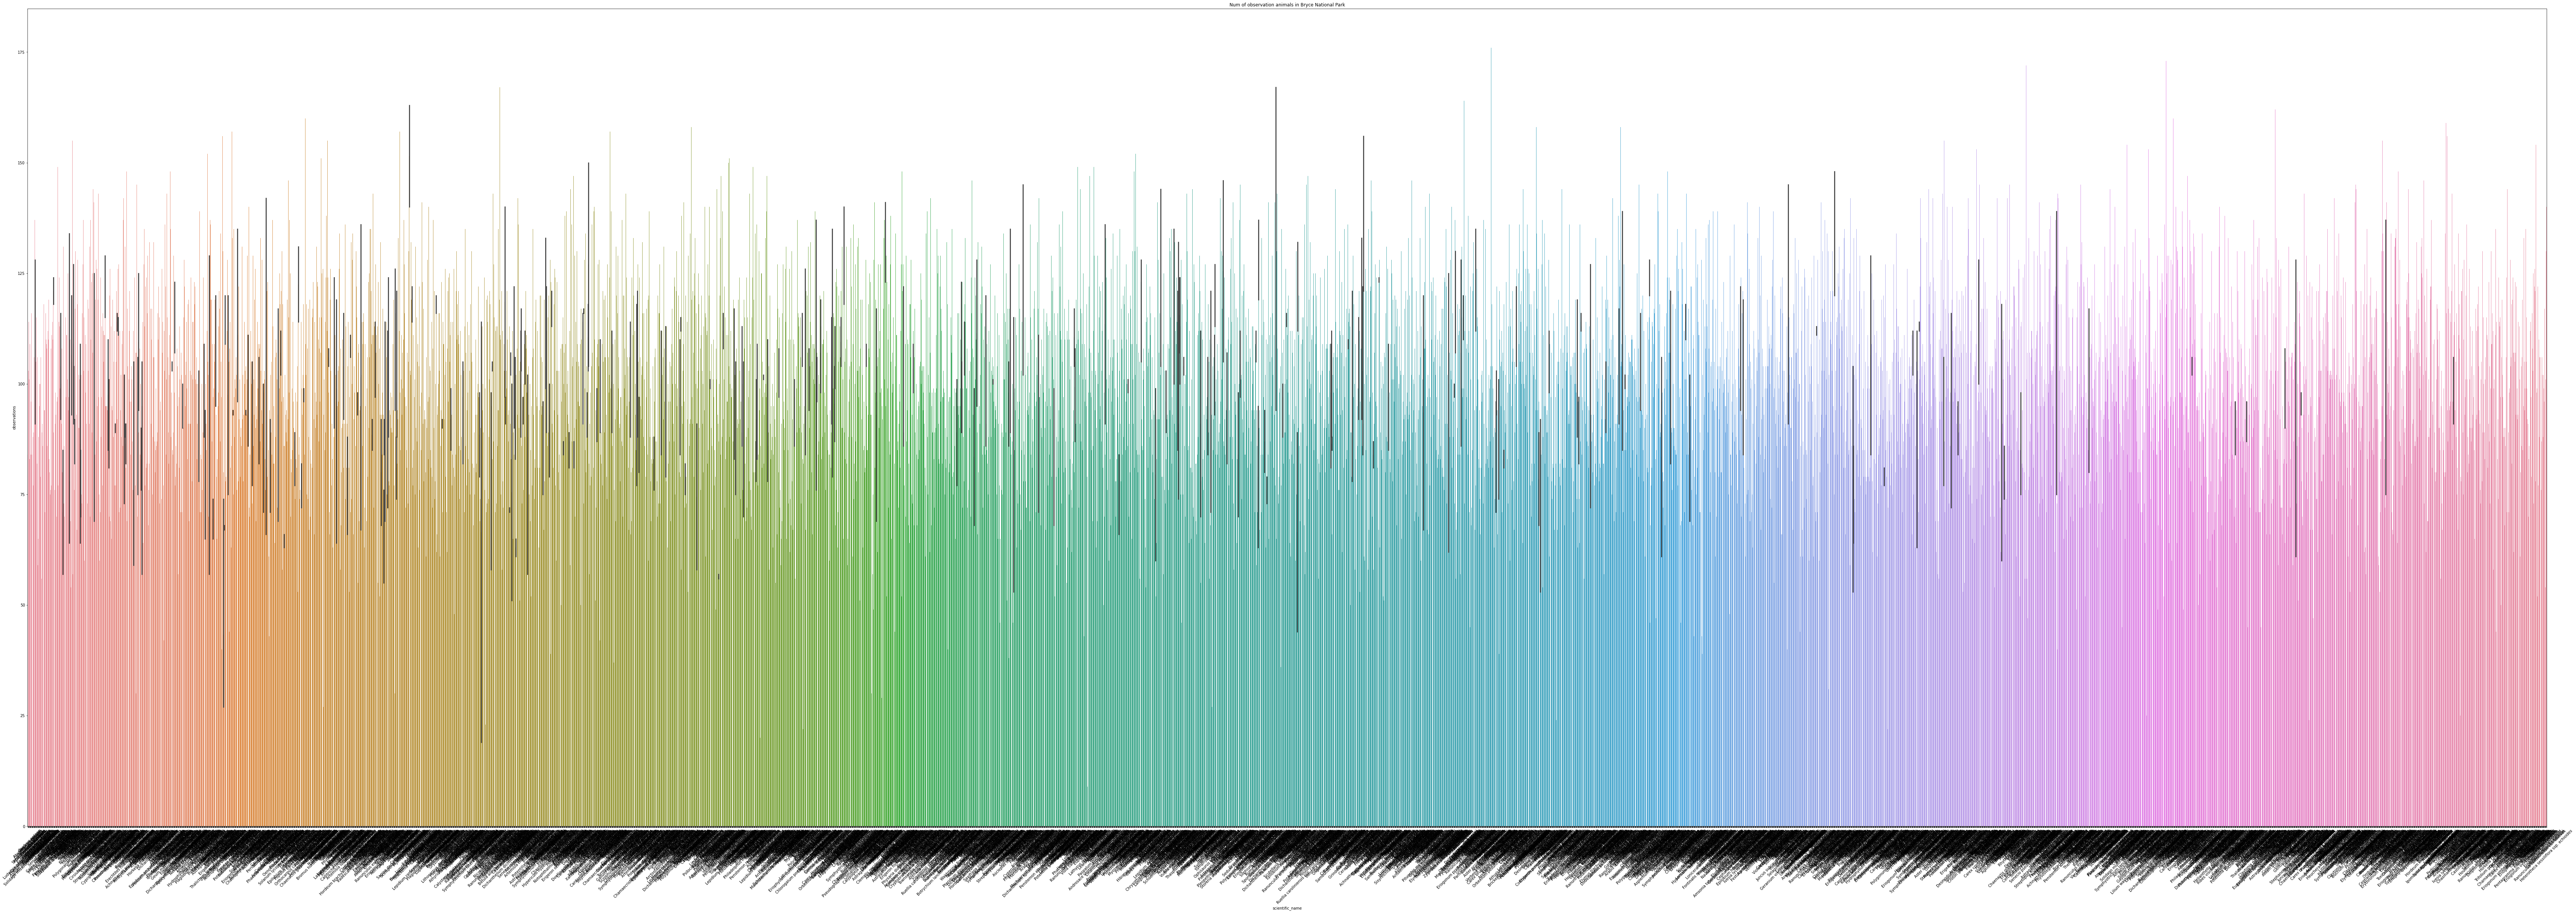

<Figure size 432x288 with 0 Axes>

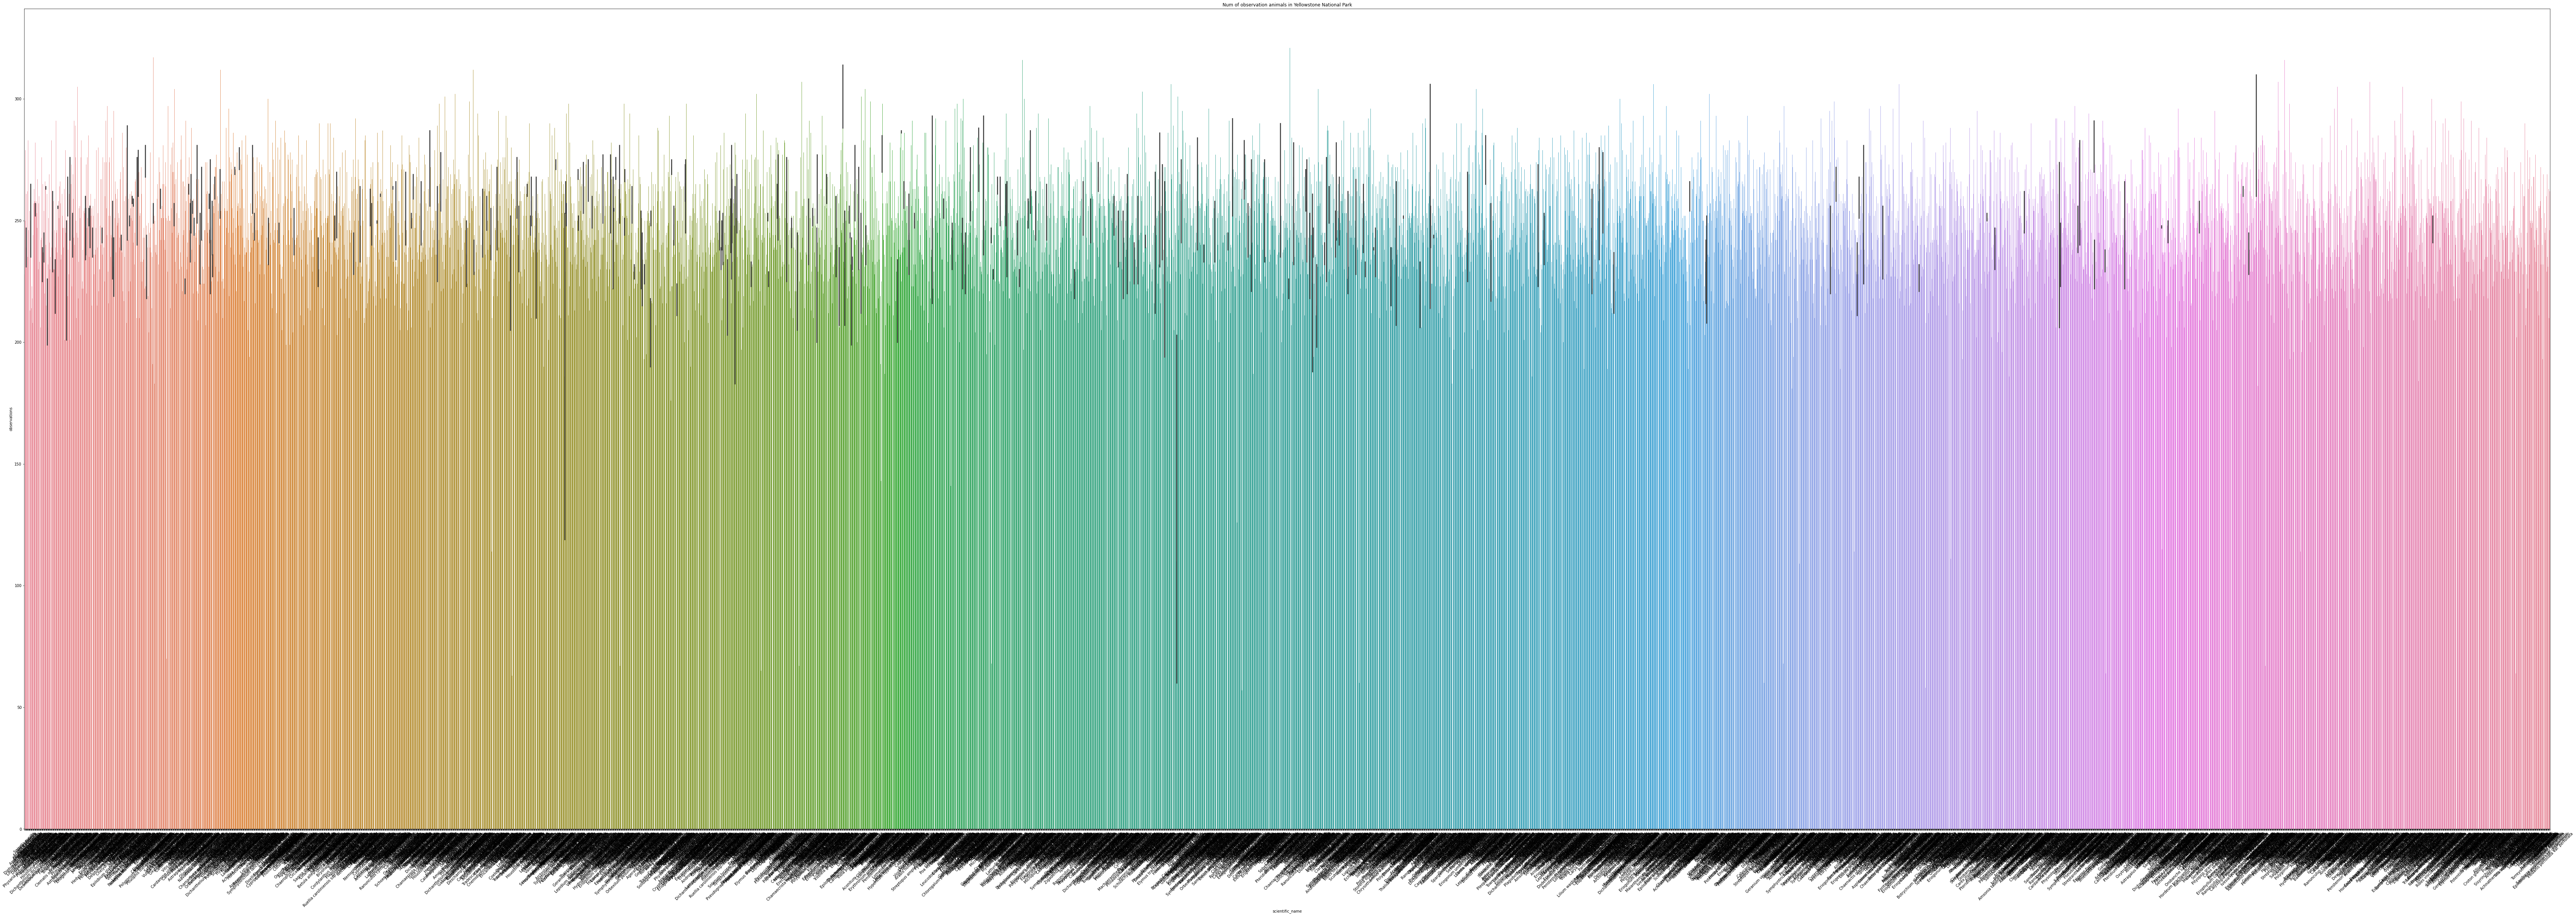

<Figure size 432x288 with 0 Axes>

In [21]:
#for park in park_names:
 #   new_park = observations[observations['park_name'] == park]
  #  plt.figure(figsize=(120,40))
   # sns.barplot(data = new_park, x='scientific_name', y = 'observations')
    #plt.title("Num of observation animals in " + park)
  #  plt.xticks(rotation=45)
   # plt.show()
    #plt.clf()